In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
file = np.genfromtxt('catRawMags1305/catDir/matchedFLCpsf0906.dat',names=True)

In [11]:
psf_dir = '/Volumes/Spare Data/Hannah_Data/mattia/rephotometryquestion/'
psf = np.genfromtxt(psf_dir + 'HOROLOGIUM_CF.1.TOSEND.CAT')

In [12]:
mat_match = np.genfromtxt('pixPosHorIhannah_idmattia.dat',names=True)

In [14]:
mat_g = mat_match[mat_match['nstar']!=-1]

In [21]:
id_col = np.array(mat_g['nstar'],dtype=int)

In [31]:
len(id_col)

1480

In [34]:
file_g = file[file['magPSF']>10]
print(len(file_g))

1487


In [35]:
magDiff = file_g['magZPT'] - file_g['magPSF']

In [36]:
print(np.median(magDiff))

0.04306906870228744


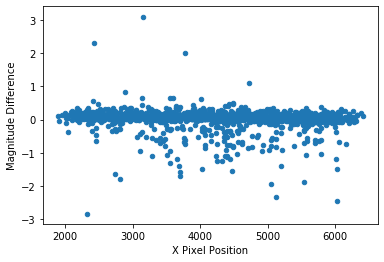

In [37]:
fig, ax = plt.subplots()

ax.scatter(file_g['xPSF_trans'],magDiff,s=20)
ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('X Pixel Position')

plt.show()

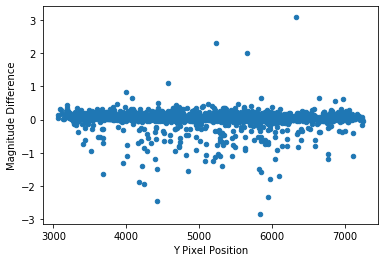

In [38]:
fig, ax = plt.subplots()

ax.scatter(file_g['yPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('Y Pixel Position')

plt.show()

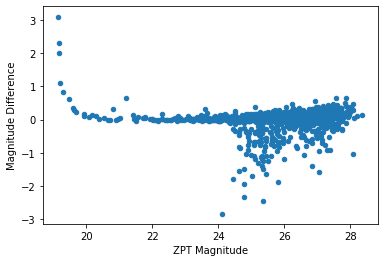

In [39]:
fig, ax = plt.subplots()

ax.scatter(file_g['magZPT'],magDiff,s=20)
ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('ZPT Magnitude')

plt.show()